# Amazon Top 50 Bestselling Books 2009 - 2021

### Exploratory Data Analysis (EDA)
This project is about the Amazon Top 50 Bestselling Books 2009 – 2021. The Dataset contains 650 rows and 8 columns. The analysis will help us have a deep understanding of the book market trends over past 13 years.

### Outline
1. Import Libraries
2. Import Data
3. Data Preperation and Data Cleaning
4. Exploratory Analysis
5. Hypothesis Test
6. Summary

### Dataset
Name: the name of book\
Author: the author of book\
User Rating: the rating of book\
Reviews: the number of book reviews\
Price: the price of book\
Year: the year it was ranked as bestseller\
Genre: fiction book/ non fiction book
 

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process
import plotly.express as px
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import shapiro
%matplotlib inline

## 2. Import Data
Dataset comes from Kaggle (https://www.kaggle.com/datasets).

In [2]:
df = pd.read_csv('Amazon Top 50 Books 2009-2021.csv')

In [3]:
df.head(10)

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,$8.00,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,$22.00,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,$15.00,15,2018,Non Fiction
3,1984,George Orwell,4.7,70425,$7.48,8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424,$6.00,6,2017,Fiction
5,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,$12.00,12,2019,Non Fiction
6,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,$11.00,11,2011,Fiction
7,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,$30.00,30,2014,Fiction
8,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,$15.00,15,2017,Fiction
9,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,$3.00,3,2018,Non Fiction


In [4]:
# rename column
df.rename(columns = {'User Rating':'Rating','Price':'Price_$', 'Price_r':'Price'}, inplace = True)
list(df)

['Name', 'Author', 'Rating', 'Reviews', 'Price_$', 'Price', 'Year', 'Genre']

## 3. Data Preperation and Data Cleaning

In [5]:
df.info()
#print information about a DataFrame including the index dtype and columns, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     650 non-null    object 
 1   Author   650 non-null    object 
 2   Rating   650 non-null    float64
 3   Reviews  650 non-null    int64  
 4   Price_$  650 non-null    object 
 5   Price    650 non-null    int64  
 6   Year     650 non-null    int64  
 7   Genre    650 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 40.8+ KB


The dataset has 650 rows, 8 columns

In [6]:
df.isnull().sum()
# check if there are null values in the dataframe

Name       0
Author     0
Rating     0
Reviews    0
Price_$    0
Price      0
Year       0
Genre      0
dtype: int64

There is no missing value

In [7]:
df.describe()
#descriptive statistics

,Rating,Reviews,Price,Year
count,650.000000,650.000000,650.000000,650.000000
mean,4.635385,17204.853846,12.796923,2015.000000
std,0.221517,20715.650579,10.168624,3.744539
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4789.250000,7.000000,2012.000000
50%,4.700000,9957.000000,11.000000,2015.000000
75%,4.800000,22359.250000,15.000000,2018.000000
max,4.900000,193482.000000,105.000000,2021.000000


Bestselling Books rating: 3.3-4.9\
Reviews: 37-193482\
Price: \\$0-\\$105

In [8]:
len(df.Name.unique())
#check duplicates

420

In [9]:
len(df.Author.unique())

292

Total row is 650, but unique book name is 420 and unique author is 292, reflecting the existence of duplicates.\
There were books that had repeatedly become bestsellers over 13 years.\
Some authors had multiple books that had become bestsellers.

In [10]:
author_list = df.Author.unique()
for author_name in author_list:
    match_author = fuzzywuzzy.process.extract(author_name, author_list, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    for scorer in match_author:
        mathch_name = scorer[0]
        mathch_score = scorer[1]
        if mathch_score == 100 and mathch_name != author_name:
            print(author_name, "matches", scorer)
    


George R. R. Martin matches ('George R.R. Martin', 100)
J.K. Rowling matches ('J. K. Rowling', 100)
George R.R. Martin matches ('George R. R. Martin', 100)
J. K. Rowling matches ('J.K. Rowling', 100)


similar spelling : 'George R. R. Martin'= 'George R.R. Martin', 'J. K. Rowling'='J.K. Rowling'

In [11]:
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')
#replace similar spelling

In [12]:
len(df.Author.unique())

290

The replacement is done. After the replacemnt, the number of authors reduces by 2.

**Conclusion: The dataset includes 351 different books written by 246 authors. They are divided into Fiction and Non Fiction books**

## 4. Exploratory Analysis

#### Genre

Q1: What kind (Non Fiction/ Fiction) of books is more popular?

In [13]:
df2 = df.groupby(['Genre'])['Genre'].count()
print(df2)

Genre
Fiction        287
Non Fiction    363
Name: Genre, dtype: int64


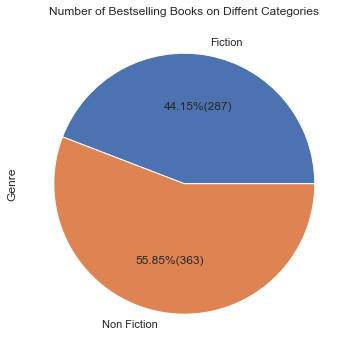

In [14]:
sns.set()
df2.plot(kind='pie',title='Number of Bestselling Books on Diffent Categories', figsize=[6,6],
        autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*df2.sum()))
plt.show()

**Insight: Non fiction books are more popular than fiction books. Therefore, non fiction books are more likely to be a bestselling book.**

#### Book Name

High Frequency Words in Book Name

(-0.5, 1999.5, 999.5, -0.5)

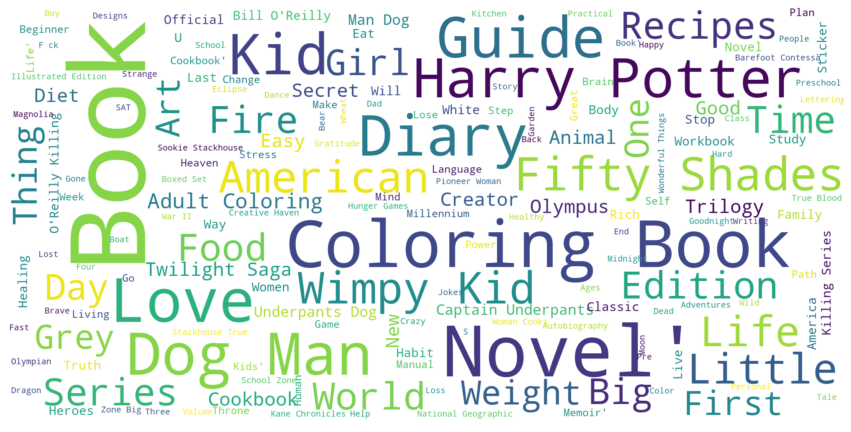

In [15]:
text = df['Name'].unique()
wordcloud = WordCloud(max_font_size=50, max_words=1000,scale=5, background_color="white").generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Insights:
1. "Love, Life, Guide, Art, Kid, Dog, Girl, Man, Adult"--> **Humanities-themed books sold better.**
2. "American"--> **American-related themes or stories are more appealing.**
3. "Harry Potter"--> **Book series are more likely to keep best-selling.**

#### User Rating

Distribution of Book Ratings

In [16]:
df.groupby('Genre')['Rating'].mean()

Genre
Fiction        4.659233
Non Fiction    4.616529
Name: Rating, dtype: float64

In [17]:
df.groupby('Genre')['Rating'].median()

Genre
Fiction        4.8
Non Fiction    4.6
Name: Rating, dtype: float64

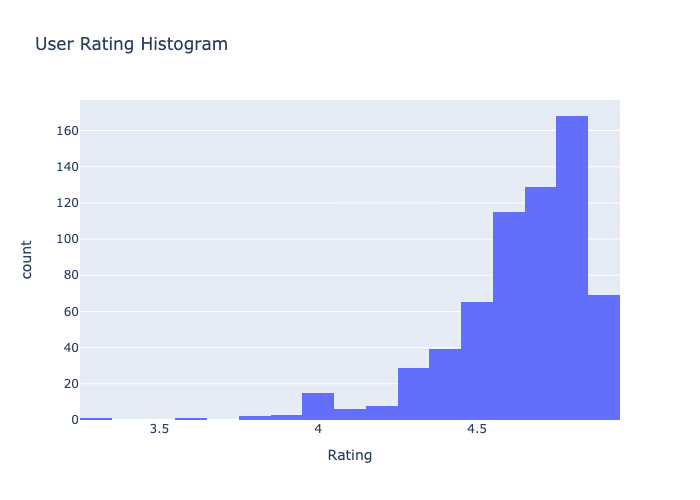

In [18]:
fig = px.histogram(df, x = "Rating", labels = {'':'The Number of Books'},title = "User Rating Histogram")
fig.show("png")

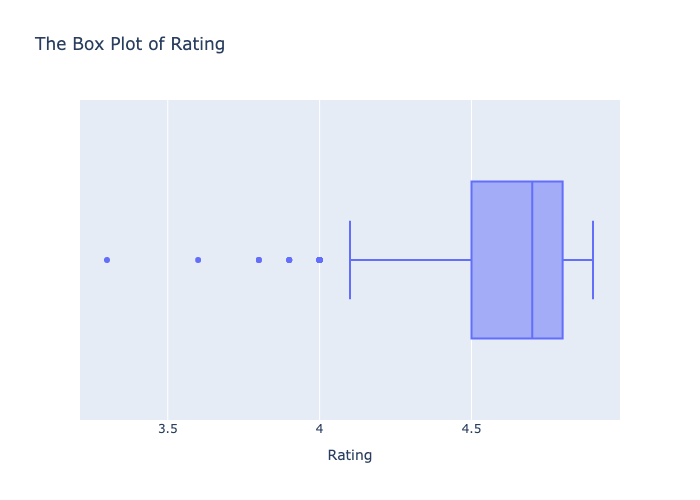

In [19]:
fig = px.box(df, x ="Rating", title = "The Box Plot of Rating")
fig.show("png")

Findings: The best-selling books were rated relatively high, concentrating on 4.5-4.9.\
Rating data has outliers. 

#### Author

Q1: Who is the most popular author (has the most best-selling books)?

In [20]:
author = df["Author"].value_counts()
author_time = []
author_name = []
for i in range(len(author)):
    author_name.append(author.keys()[i])
    author_time.append(author[i])

In [21]:
popular_author = pd.DataFrame({"Author":author_name,"Number of Times":author_time})
popular_author.head(10)

,Author,Number of Times
0,Jeff Kinney,14
1,Gary Chapman,13
2,Suzanne Collins,12
3,Rick Riordan,11
4,American Psychological Association,11
5,Dr. Seuss,10
6,Gallup,9
7,Dav Pilkey,9
8,Eric Carle,9
9,Stephenie Meyer,8


The most popular author is Jeff Kinney.

Q2. Which author has the highest average rating？

In [22]:
rating_author = df.groupby('Author')[['Rating']].mean().sort_values('Rating', ascending=False).head(20).reset_index()
rating_author

,Author,Rating
0,Jill Twiss,4.900000
1,Amelia Hepworth,4.900000
2,Nathan W. Pyle,4.900000
3,Patrick Thorpe,4.900000
4,Pete Souza,4.900000
5,Emily Winfield Martin,4.900000
6,Rush Limbaugh,4.900000
7,Sherri Duskey Rinker,4.900000
8,Chip Gaines,4.900000
9,Bill Martin Jr.,4.900000


Findings:\
There were 16 authors whose books had an average rating of 4.9.\
**Dr.Seuss, Dav Pilkey, Eric Carle are popular and well-regarded authors.**


#### Reviews

Distribution of Book Reviews

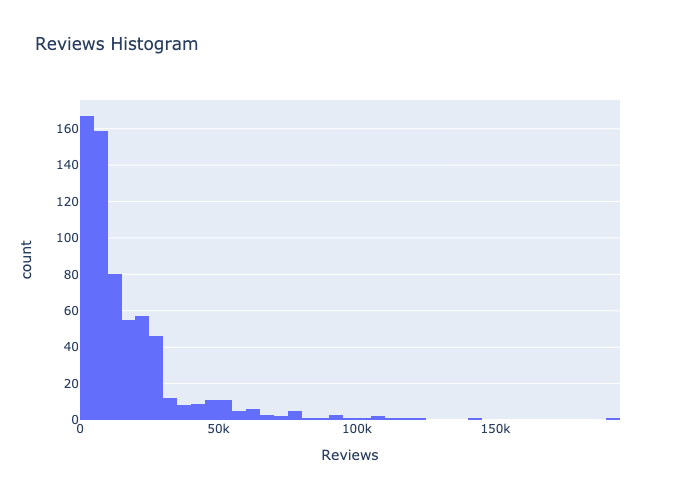

In [23]:
fig = px.histogram(df, x="Reviews",labels={'':'The Number of Books'},title="Reviews Histogram")
fig.show("png")

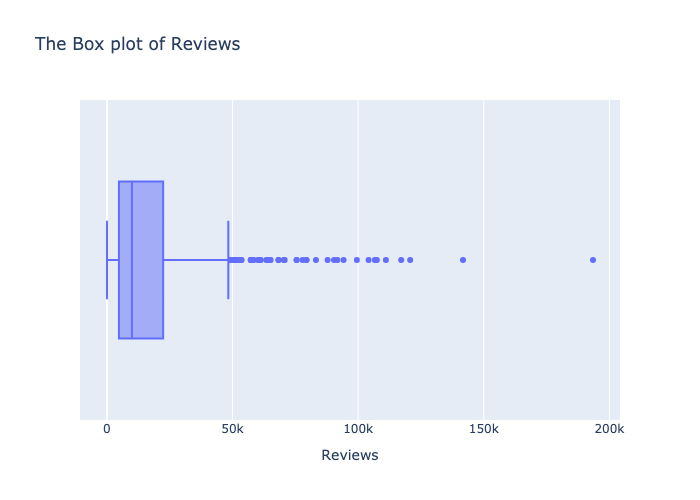

In [24]:
fig = px.box(df, x ="Reviews", title = "The Box plot of Reviews")
fig.show("png")

Findings: Book reviews for bestsellers are concentrated in the range of 0-30k.
Review data has outliers.

#### Price

Distribution of Book Prices

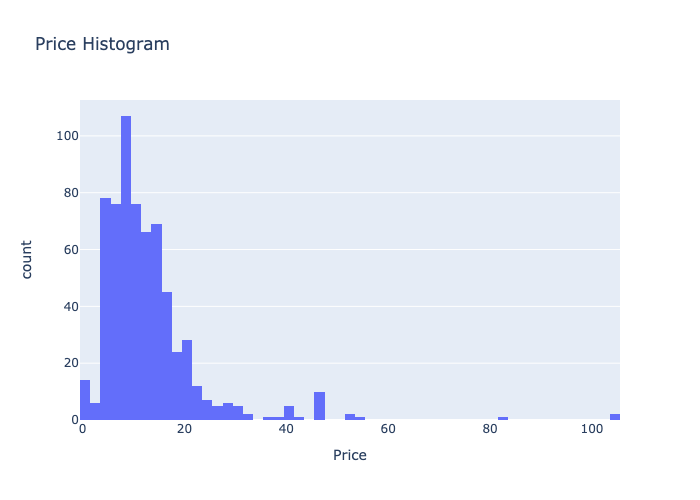

In [25]:
fig = px.histogram(df, x="Price",labels={'':'The Number of Books'},title="Price Histogram")
fig.show("png")

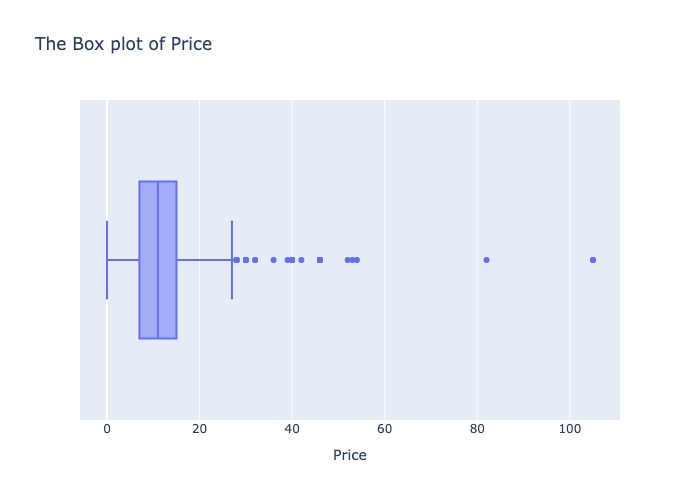

In [26]:
fig = px.box(df, x ="Price", title = "The Box plot of Price")
fig.show("png")

**Insights: The prices of bestsellers are widely distributed between \\$0 and \\$30, indicating a small audience for expensive books.**

## 5. Hypothesis Test

In [27]:
df.corr()
#check correlation

,Rating,Reviews,Price,Year
Rating,1.000000,0.055540,-0.142234,0.290899
Reviews,0.055540,1.000000,-0.088796,0.489850
Price,-0.142234,-0.088796,1.000000,-0.160854
Year,0.290899,0.489850,-0.160854,1.000000


Rating, Reviews and Price have a weak correlation with each other.

Q1: Is there a difference in the rating of different types of books?

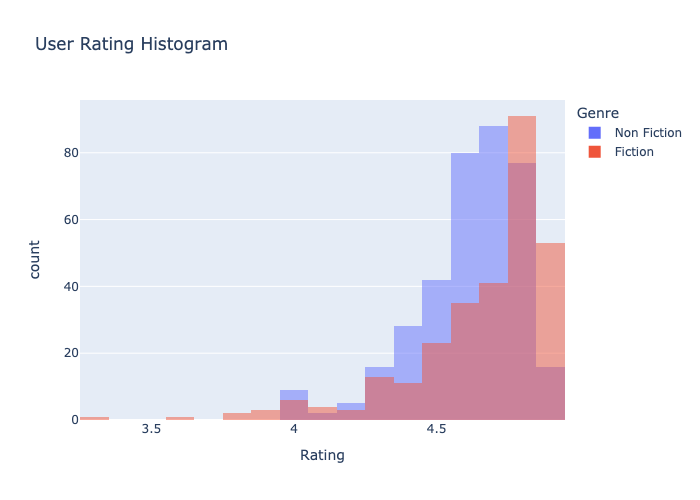

In [28]:
fig = px.histogram(df, x = "Rating", color = "Genre", barmode="overlay", labels = {'':'The Number of Books'},title = "User Rating Histogram")
fig.show("png")

The graph shows that there is a difference in the distribution of ratings between fiction and non-fiction.

$H_{0}$:$μ_{f}$ = $μ_{n}$ User ratings are the same with fiction and non-fiction books\
$H_{1}$:$μ_{f}$ ≠ $μ_{n}$ There are rating difference between fiction and non-fiction books.

### Check the Distribution and Variance

$H_{0}$: Data is normally distributed\
$H_{1}$: Data is not normally distributed

In [29]:
# from scipy.stats import shapiro

stat, p = shapiro(df["Rating"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print("Reject H0. Data is not normally distributed")
else:
    print("Fail to reject H0. Data is normally distributed")

Statistics=0.862, p=0.000
Reject H0. Data is not normally distributed


$H_{0}$: Variances of data are the same.\
$H_{1}$: Variance of data are different.

In [30]:
non_fiction = df[df['Genre'] == 'Non Fiction']['Rating']
fiction = df[df['Genre'] == 'Fiction']['Rating']

In [31]:
import scipy.stats as stats
stat, p = stats.levene(non_fiction,fiction)
print("p value:%.4f" % p)
if p <0.05:
    print("Reject H0. The variances of data are different.")
else:
    print("Fail to reject H0. The variances of data are same.")

p value:0.0153
Reject H0. The variances of data are different.


The normality and variance homogeneity assumptions are not satisfied, therefore we need to use the nonparametric version of ANOVA for unpaired data.

$H_{0}$:$μ_{f}$ = $μ_{n}$\
$H_{1}$:$μ_{f}$ ≠ $μ_{n}$

In [32]:
F, p = stats.kruskal(non_fiction, fiction)
print("p value:%.6f" % p)
if p <0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

p value:0.000000
Reject H0


There are significant differences between fiction books and non-fiction books.

Findings: Genre significantly differ in terms of rating. Users may evaluate a book depend on the genre.

## 6. Summary

Books with Non-fiction genres, humanistic topics, and involving American life are more likely to be popular. The low price lays the foundation for widespread purchase. People may rate a book differently depending on the genre. On average, fiction books have higher ratings than non-fiction ones. Books written by some authors often become bestsellers, such as Jeff Kinney. Dr.Seuss, Dav Pilkey, Eric Carle are popular and well-regarded authors.